In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 107MB/s] 
100% 1.06G/1.06G [00:10<00:00, 104MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Normalize data
def preprocess(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),

    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0000001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=[reduce_lr, early_stop])


Epoch 1/20
625/625 [==============================] - 80s 113ms/step - loss: 1.4326 - accuracy: 0.6047 - val_loss: 1.2690 - val_accuracy: 0.6856 - lr: 1.0000e-05
Epoch 2/20
625/625 [==============================] - 69s 111ms/step - loss: 1.2762 - accuracy: 0.6830 - val_loss: 1.2114 - val_accuracy: 0.7292 - lr: 1.0000e-05
Epoch 3/20
625/625 [==============================] - 74s 119ms/step - loss: 1.2159 - accuracy: 0.7219 - val_loss: 1.1738 - val_accuracy: 0.7550 - lr: 1.0000e-05
Epoch 4/20
625/625 [==============================] - 70s 111ms/step - loss: 1.1740 - accuracy: 0.7498 - val_loss: 1.1497 - val_accuracy: 0.7654 - lr: 1.0000e-05
Epoch 5/20
625/625 [==============================] - 71s 113ms/step - loss: 1.1238 - accuracy: 0.7789 - val_loss: 1.1398 - val_accuracy: 0.7698 - lr: 1.0000e-05
Epoch 6/20
625/625 [==============================] - 71s 113ms/step - loss: 1.0874 - accuracy: 0.7939 - val_loss: 1.1159 - val_accuracy: 0.7768 - lr: 1.0000e-05
Epoch 7/20
625/625 [========

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_ds)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


157/157 [==============================] - 10s 60ms/step - loss: 0.9418 - accuracy: 0.8142
Test Loss: 0.9417577385902405, Test Accuracy: 0.8141999840736389


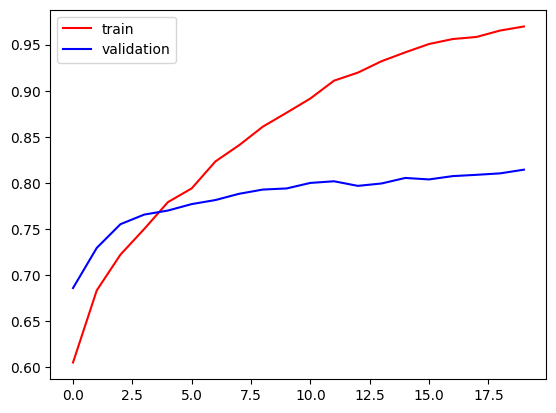

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

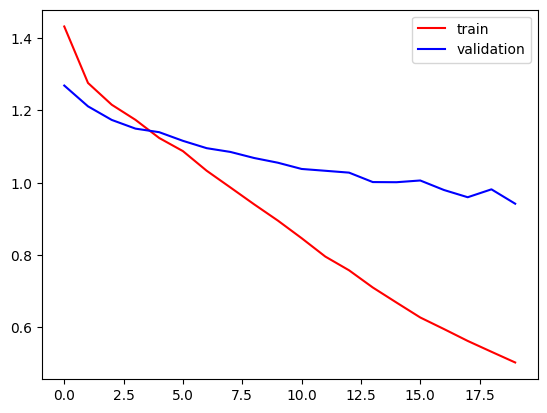

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image_path = '/content/dog.jpg'
test_image = load_img(test_image_path, target_size=(256, 256))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array = test_image_array / 255.0

prediction = model.predict(test_image_array)

print(prediction)


1/1 [==============================] - 0s 21ms/step
[[0.9868241]]
